#📌 Extracción

In [10]:
import pandas as pd
#Leer el archivo json desde Github
url = 'https://raw.githubusercontent.com/palmeiros/ChallengeTelecomX1/refs/heads/main/TelecomX_Data.json'
datos = pd.read_json(url)
datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [16]:
import pandas as pd
import requests
import json

# URL directa al archivo RAW en GitHub
url = 'https://raw.githubusercontent.com/palmeiros/ChallengeTelecomX1/refs/heads/main/TelecomX_Data.json'

# Descargar datos
response = requests.get(url)
data = json.loads(response.text)

# Convertir a DataFrame
df = pd.DataFrame(data)

# Ver primeras filas
print(df.head())

# Ver info rápida
print(df.info())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [17]:
df = pd.json_normalize(data)

In [18]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [24]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


#🔧 Transformación

Procedemos a modificar los nombres de columnas, cambiar todo el texto en minúsculas y sin espacios extra, transformar valores como “NA” o “null” en NaN, y columnas monetarias y numéricas en texto a formato numérico, unificar categorías usando búsquedas con startswith y contains, eliminar filas duplicadas y al final mostrar un resumen con el tipo de dato, valores únicos y porcentaje de nulos por columna, dejando la información lista para análisis sin problemas de formato ni incoherencias.

In [39]:
import pandas as pd
import numpy as np

def clean_generic_with_summary(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # 1. Normalizar nombres de columnas
    df.columns = (
        df.columns.str.strip()
                  .str.replace(r"\s+", "_", regex=True)
                  .str.replace(r"[^\w\.]", "_", regex=True)
                  .str.lower()
    )

    # 2. Limpiar y uniformar strings
    obj_cols = df.select_dtypes(include="object").columns
    for c in obj_cols:
        df[c] = df[c].astype(str).str.strip().str.lower().str.replace(r"\s+", " ", regex=True)
        df[c] = df[c].replace({"": np.nan, "na": np.nan, "n/a": np.nan, "null": np.nan, "none": np.nan})

    # 3. Detectar y limpiar columnas tipo dinero
    money_cols = [c for c in obj_cols if df[c].str.contains(r"[\$\,]", na=False).any()]
    for c in money_cols:
        df[c] = df[c].str.replace(r"[\$,]", "", regex=True)
        df[c] = pd.to_numeric(df[c], errors="coerce")

    # 4. Convertir columnas numéricas ocultas en texto
    for c in obj_cols:
        if c not in money_cols:
            try_num = pd.to_numeric(df[c], errors="coerce")
            if try_num.notna().mean() > 0.5:
                df[c] = try_num

    # 5. Ejemplos de startswith / contains para unificar categorías
    for c in obj_cols:
        if df[c].dtype == "object":
            df.loc[df[c].str.startswith("cred", na=False), c] = "credit card"
            df.loc[df[c].str.contains("bank", na=False), c] = "bank transfer"

    # 6. Quitar duplicados
    df = df.drop_duplicates()

    # 7. Resumen post-limpieza
    resumen = pd.DataFrame({
        "Tipo": df.dtypes,
        "Valores únicos": df.nunique(dropna=True),
        "Nulos (%)": df.isna().mean() * 100
    })
    print("\n📊 Resumen del DataFrame después de la limpieza:\n")
    print(resumen)

    return df

# 3. Vista rápida
df.head()


📊 Resumen del DataFrame después de la limpieza:

               Tipo  Valores únicos   Nulos (%)
customerid   object            7267    0.000000
churn        object               2    3.082427
customer    float64               0  100.000000
phone       float64               0  100.000000
internet    float64               0  100.000000
account     float64               0  100.000000


,customerid,churn,customer,phone,internet,account
0,0002-orfbo,no,NaN,NaN,NaN,NaN
1,0003-mknfe,no,NaN,NaN,NaN,NaN
2,0004-tlhlj,yes,NaN,NaN,NaN,NaN
3,0011-igkff,yes,NaN,NaN,NaN,NaN
4,0013-exchz,yes,NaN,NaN,NaN,NaN


#📊 Carga y análisis

In [46]:
df = pd.json_normalize(data)

En este paso crearemos la columna "Cuentas_Diarias" utilizando la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [47]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [48]:
# Asegurar formato numérico
df["account.Charges.Monthly"] = pd.to_numeric(df["account.Charges.Monthly"], errors="coerce")
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")
df["customer.tenure"] = pd.to_numeric(df["customer.tenure"], errors="coerce")

# Calcular Cuentas_Diarias
df["Cuentas_Diarias"] = df["account.Charges.Total"] / (df["customer.tenure"] * 30)

# Para clientes nuevos o tenure=0, usar el valor mensual como aproximación
df.loc[df["Cuentas_Diarias"].isna() | (df["Cuentas_Diarias"] == 0),
       "Cuentas_Diarias"] = df["account.Charges.Monthly"] / 30

# Vista rápida
df[["customerID", "account.Charges.Monthly", "account.Charges.Total", "customer.tenure", "Cuentas_Diarias"]].head()


,customerID,account.Charges.Monthly,account.Charges.Total,customer.tenure,Cuentas_Diarias
0,0002-ORFBO,65.6,593.30,9,2.197407
1,0003-MKNFE,59.9,542.40,9,2.008889
2,0004-TLHLJ,73.9,280.85,4,2.340417
3,0011-IGKFF,98.0,1237.85,13,3.173974
4,0013-EXCHZ,83.9,267.40,3,2.971111


# **Estandarizacion**

In [50]:
import pandas as pd
import numpy as np
import re

def map_yes_no(s: pd.Series) -> pd.Series:
    if s is None: return s
    x = s.astype(str).str.strip().str.lower()
    yes = {"yes","sí","si","true","1","y","s"}
    no  = {"no","false","0","n"}
    # Casos especiales comunes en Telco
    x = x.replace({"no internet service":"no", "no phone service":"no"})
    out = (
        x.map(lambda v: 1 if v in yes else (0 if v in no else np.nan))
          .astype("Int64")
    )
    return out

def standardize_transform(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # -------- 1) Renombrado a español  --------
    rename_map = {
        # IDs / cliente
        r"^customerid$": "id_cliente",
        # Demografía
        r"(^|\.)(gender)$": "genero",
        r"(^|\.)(seniorcitizen)$": "adulto_mayor",
        r"(^|\.)(partner)$": "pareja",
        r"(^|\.)(dependents)$": "dependientes",
        r"(^|\.)(tenure)$": "meses_antiguedad",
        # Servicios
        r"(^|\.)(phoneservice)$": "servicio_telefono",
        r"(^|\.)(multiplelines)$": "lineas_multiples",
        r"(^|\.)(internetservice)$": "tipo_internet",
        r"(^|\.)(onlinesecurity)$": "seguridad_en_linea",
        r"(^|\.)(onlinebackup)$": "respaldo_en_linea",
        r"(^|\.)(deviceprotection)$": "proteccion_dispositivo",
        r"(^|\.)(techsupport)$": "soporte_tecnico",
        r"(^|\.)(streamingtv)$": "tv_streaming",
        r"(^|\.)(streamingmovies)$": "peliculas_streaming",
        # Cuenta / cargos
        r"(^|\.)(contract)$": "tipo_contrato",
        r"(^|\.)(paperlessbilling)$": "facturacion_electronica",
        r"(^|\.)(paymentmethod)$": "metodo_pago",
        r"(^|\.)(charges\.monthly)$": "cargo_mensual",
        r"(^|\.)(charges\.total)$": "cargo_total",
        # Target
        r"(^|\.)(churn)$": "churn",
    }

    # normaliza nombres a lower
    df.columns = df.columns.str.strip().str.lower()
    # aplica los renombres por regex
    new_cols = []
    for c in df.columns:
        new_name = c
        for pat, rep in rename_map.items():
            if re.search(pat, c):
                new_name = rep
                break
        new_cols.append(new_name)
    df.columns = new_cols

    # -------- 2) Binarios a 1/0 --------
    bin_candidates = [
        "churn","pareja","dependientes","servicio_telefono","lineas_multiples",
        "seguridad_en_linea","respaldo_en_linea","proteccion_dispositivo",
        "soporte_tecnico","tv_streaming","peliculas_streaming","facturacion_electronica"
    ]
    for col in bin_candidates:
        if col in df.columns:
            df[col] = map_yes_no(df[col])

    # -------- 3) Numéricos: conviertes lo que aplique --------
    for col in ["adulto_mayor","meses_antiguedad","cargo_mensual","cargo_total"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # -------- 4) Categóricas clave: limpieza leve --------
    if "genero" in df.columns:
        df["genero"] = df["genero"].replace({"m":"male","f":"female"})
    if "tipo_internet" in df.columns:
        df["tipo_internet"] = df["tipo_internet"].replace({"fiber":"fiber optic"})

    # -------- 5) Contrato: ordinal opcional (0,1,2) + dummies --------
    if "tipo_contrato" in df.columns:
        s = df["tipo_contrato"].astype(str).str.lower()
        contrato_ord = np.select(
            [
                s.str.contains("month", na=False),
                s.str.contains("one", na=False) | s.str.contains(r"\b1\b", na=False),
                s.str.contains("two", na=False) | s.str.contains(r"\b2\b", na=False),
            ],
            [0, 1, 2],
            default=np.nan
        )
        df["contrato_ordinal"] = pd.array(contrato_ord, dtype="Float64")

    # -------- 6) One-Hot para categorías útiles --------
    cat_for_dummies = [c for c in ["tipo_internet","metodo_pago","tipo_contrato","genero"] if c in df.columns]
    if cat_for_dummies:
        df = pd.get_dummies(df, columns=cat_for_dummies, prefix=cat_for_dummies, drop_first=True, dtype="uint8")

    return df

In [51]:
df_std = standardize_transform(df)

In [52]:
df_std.head(), df_std.dtypes

(   id_cliente  churn  adulto_mayor  pareja  dependientes  meses_antiguedad  \
 0  0002-ORFBO      0             0       1             1                 9   
 1  0003-MKNFE      0             0       0             0                 9   
 2  0004-TLHLJ      1             0       0             0                 4   
 3  0011-IGKFF      1             1       1             0                13   
 4  0013-EXCHZ      1             1       1             0                 3   
 
    servicio_telefono  lineas_multiples  seguridad_en_linea  respaldo_en_linea  \
 0                  1                 0                   0                  1   
 1                  1                 1                   0                  0   
 2                  1                 0                   0                  0   
 3                  1                 0                   0                  1   
 4                  1                 0                   0                  0   
 
    ...  cuentas_diarias  cont

# **Análisis descriptivo**

In [53]:
# Numéricas
print("\n📊 Estadísticas de columnas numéricas:\n")
print(df_std.describe().T)

# Categóricas
print("\n🔤 Estadísticas de columnas categóricas:\n")
print(df_std.describe(include=['object', 'category']).T)


📊 Estadísticas de columnas numéricas:

                                      count         mean          std  \
churn                                7043.0      0.26537     0.441561   
adulto_mayor                         7267.0     0.162653     0.369074   
pareja                               7267.0     0.484106     0.499782   
dependientes                         7267.0     0.300124     0.458343   
meses_antiguedad                     7267.0    32.346498    24.571773   
servicio_telefono                    7267.0     0.902711     0.296371   
lineas_multiples                     7267.0      0.42177     0.493876   
seguridad_en_linea                   7267.0      0.28595     0.451897   
respaldo_en_linea                    7267.0     0.344571     0.475261   
proteccion_dispositivo               7267.0     0.342782     0.474672   
soporte_tecnico                      7267.0     0.289528     0.453575   
tv_streaming                         7267.0     0.383927     0.486374   
peliculas_s

Otra opcion más extendida del análisis descriptivo es la siguiente:

In [55]:
import pandas as pd
import numpy as np

def analisis_descriptivo_extendido(df: pd.DataFrame) -> pd.DataFrame:
    resumen = pd.DataFrame({
        "Tipo": df.dtypes,
        "No. Valores Únicos": df.nunique(dropna=True),
        "Valores Nulos (%)": df.isna().mean() * 100
    })

    # Valor más frecuente y su frecuencia
    top_values = []
    freq_values = []
    for col in df.columns:
        if not df[col].isna().all():
            top = df[col].mode(dropna=True)
            top_val = top.iloc[0] if not top.empty else np.nan
            freq_val = df[col].value_counts(dropna=True).iloc[0] if not top.empty else np.nan
        else:
            top_val = np.nan
            freq_val = np.nan
        top_values.append(top_val)
        freq_values.append(freq_val)

    resumen["Valor más frecuente"] = top_values
    resumen["Frecuencia"] = freq_values

    # Para columnas numéricas, agrega media, min y max
    resumen["Media"] = df.mean(numeric_only=True)
    resumen["Mínimo"] = df.min(numeric_only=True)
    resumen["Máximo"] = df.max(numeric_only=True)

    return resumen

In [56]:
df_std = standardize_transform(df)
resumen_df = analisis_descriptivo_extendido(df_std)
print("\n📊 Análisis descriptivo extendido:\n")
print(resumen_df)


📊 Análisis descriptivo extendido:

                                        Tipo  No. Valores Únicos  \
id_cliente                            object                7267   
churn                                  Int64                   2   
adulto_mayor                           int64                   2   
pareja                                 Int64                   2   
dependientes                           Int64                   2   
meses_antiguedad                       int64                  73   
servicio_telefono                      Int64                   2   
lineas_multiples                       Int64                   2   
seguridad_en_linea                     Int64                   2   
respaldo_en_linea                      Int64                   2   
proteccion_dispositivo                 Int64                   2   
soporte_tecnico                        Int64                   2   
tv_streaming                           Int64                   2   
peliculas_st

# **Distribución de churn**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

/tmp/ipython-input-307967453.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_std, palette=['#4CAF50','#F44336'])


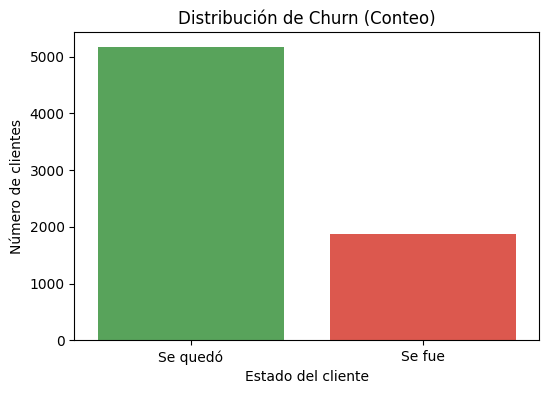

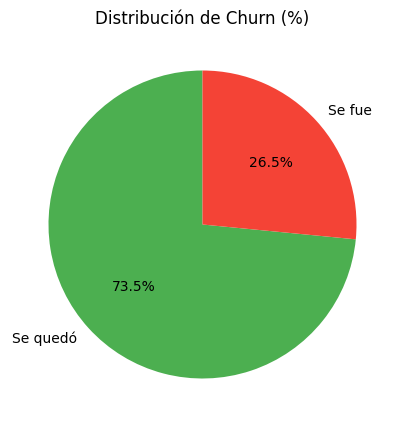

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos que churn esté en formato binario (1 = se fue, 0 = se quedó)
# Si todavía es texto:
if df_std['churn'].dtype != 'int64' and df_std['churn'].dtype != 'Int64':
    df_std['churn'] = df_std['churn'].map({'yes':1, 'no':0, 1:1, 0:0})

# Conteo absoluto
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df_std, palette=['#4CAF50','#F44336'])
plt.xticks([0, 1], ['Se quedó', 'Se fue'])
plt.title('Distribución de Churn (Conteo)')
plt.xlabel('Estado del cliente')
plt.ylabel('Número de clientes')
plt.show()

# Proporción en porcentaje
churn_counts = df_std['churn'].value_counts(normalize=True) * 100
plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=['Se quedó', 'Se fue'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#F44336'])
plt.title('Distribución de Churn (%)')
plt.show()

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.
Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Voy a graficar estas variables categóricas: ['customer.gender', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']


/tmp/ipython-input-3160113255.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp[var].astype(str), rotation=30, ha='right')
/tmp/ipython-input-3160113255.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp[var].astype(str), rotation=30, ha='right')
/tmp/ipython-input-3160113255.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp[var].astype(str), rotation=30, ha='right')
/tmp/ipython-input-3160113255.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tmp[var].astype(str), rotation=30, ha='right')


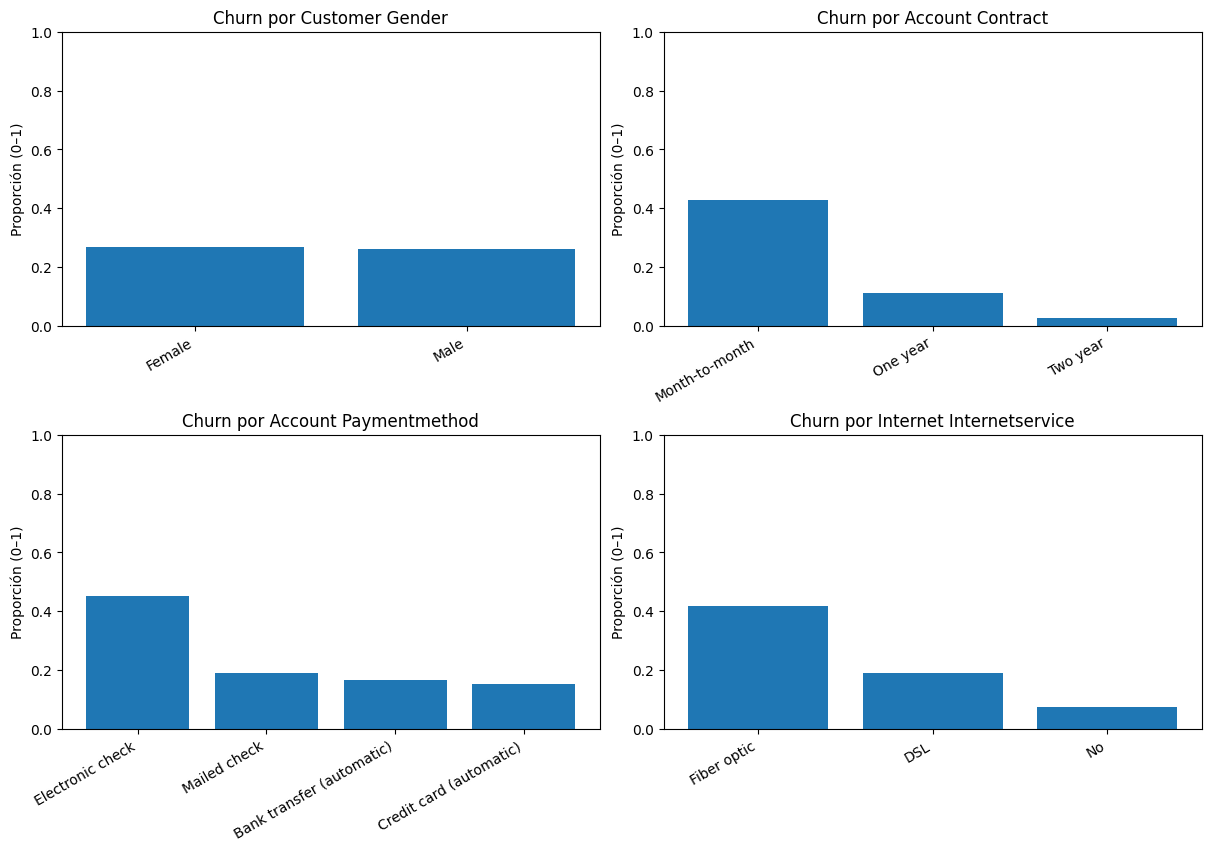


📊 Proporción de churn por categoría:

                variable customer.gender  prop_churn
         customer.gender          Female    0.269209
         customer.gender            Male    0.261603
        account.Contract             NaN    0.427097
        account.Contract             NaN    0.112695
        account.Contract             NaN    0.028319
   account.PaymentMethod             NaN    0.452854
   account.PaymentMethod             NaN    0.191067
   account.PaymentMethod             NaN    0.167098
   account.PaymentMethod             NaN    0.152431
internet.InternetService             NaN    0.418928
internet.InternetService             NaN    0.189591
internet.InternetService             NaN    0.074050


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# ========= 1) Detectar y binarizar churn =========
# Buscar columna churn por nombre (case-insensitive)
lower_cols = {c.lower(): c for c in df.columns}
if 'churn' in lower_cols:
    churn_col = lower_cols['churn']
else:
    raise ValueError("No encontré columna 'Churn' en el DataFrame. Columnas: " + str(df.columns.tolist()))

# Mapear a 0/1 (soporta yes/no/sí/si/true/false/0/1)
churn_map = {'yes':1,'no':0,'sí':1,'si':1,'true':1,'false':0,'1':1,'0':0}
df['churn_bin'] = (
    df[churn_col].astype(str).str.strip().str.lower().map(churn_map)
)

if df['churn_bin'].isna().all():
    raise ValueError("No pude mapear 'Churn' a 0/1. Revisa valores únicos: " + str(df[churn_col].unique()))

# ========= 2) Variables categóricas a explorar (las que me diste) =========
candidatas = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]
presentes = [c for c in candidatas if c in df.columns]
if not presentes:
    raise ValueError("Ninguna de las columnas categóricas esperadas está. Columnas: " + str(df.columns.tolist()))
print("Voy a graficar estas variables categóricas:", presentes)

# ========= 3) Calcular proporciones y graficar en subplots =========
n = len(presentes)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4.2*rows), constrained_layout=True)
axes = np.atleast_1d(axes).ravel()

res_list = []
for i, var in enumerate(presentes):
    # Proporción de churn por categoría (0-1)
    tmp = (
        df.groupby(var, dropna=False)['churn_bin']
          .mean()
          .reset_index()
          .rename(columns={'churn_bin':'prop_churn'})
          .sort_values('prop_churn', ascending=False)
    )
    res_list.append(tmp.assign(variable=var))

    ax = axes[i]
    ax.bar(tmp[var].astype(str), tmp['prop_churn'])
    # Título bonito
    titulo = var.replace('.', ' ').title()
    ax.set_title(f'Churn por {titulo}')
    ax.set_ylabel('Proporción (0–1)')
    ax.set_ylim(0, 1)
    ax.set_xticklabels(tmp[var].astype(str), rotation=30, ha='right')

# Ocultar axes sobrantes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# ========= 4) Tabla de proporciones =========
resumen = pd.concat(res_list, ignore_index=True)
print("\n📊 Proporción de churn por categoría:\n")
print(resumen[['variable', presentes[0] if presentes else '', 'prop_churn']].to_string(index=False))
# Nota: la columna mostrada en la tabla será la primera; si quieres *todas*, imprime 'resumen' completo.

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.
Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

Voy a analizar estas variables numéricas: ['account.Charges.Total', 'account.Charges.Monthly', 'customer.tenure']


/tmp/ipython-input-2309944450.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn_bin', y=col, palette=['#4CAF50','#F44336'], ax=axes[i,1])
/tmp/ipython-input-2309944450.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,1].set_xticklabels(['Se quedó','Se fue'])
/tmp/ipython-input-2309944450.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn_bin', y=col, palette=['#4CAF50','#F44336'], ax=axes[i,1])
/tmp/ipython-input-2309944450.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

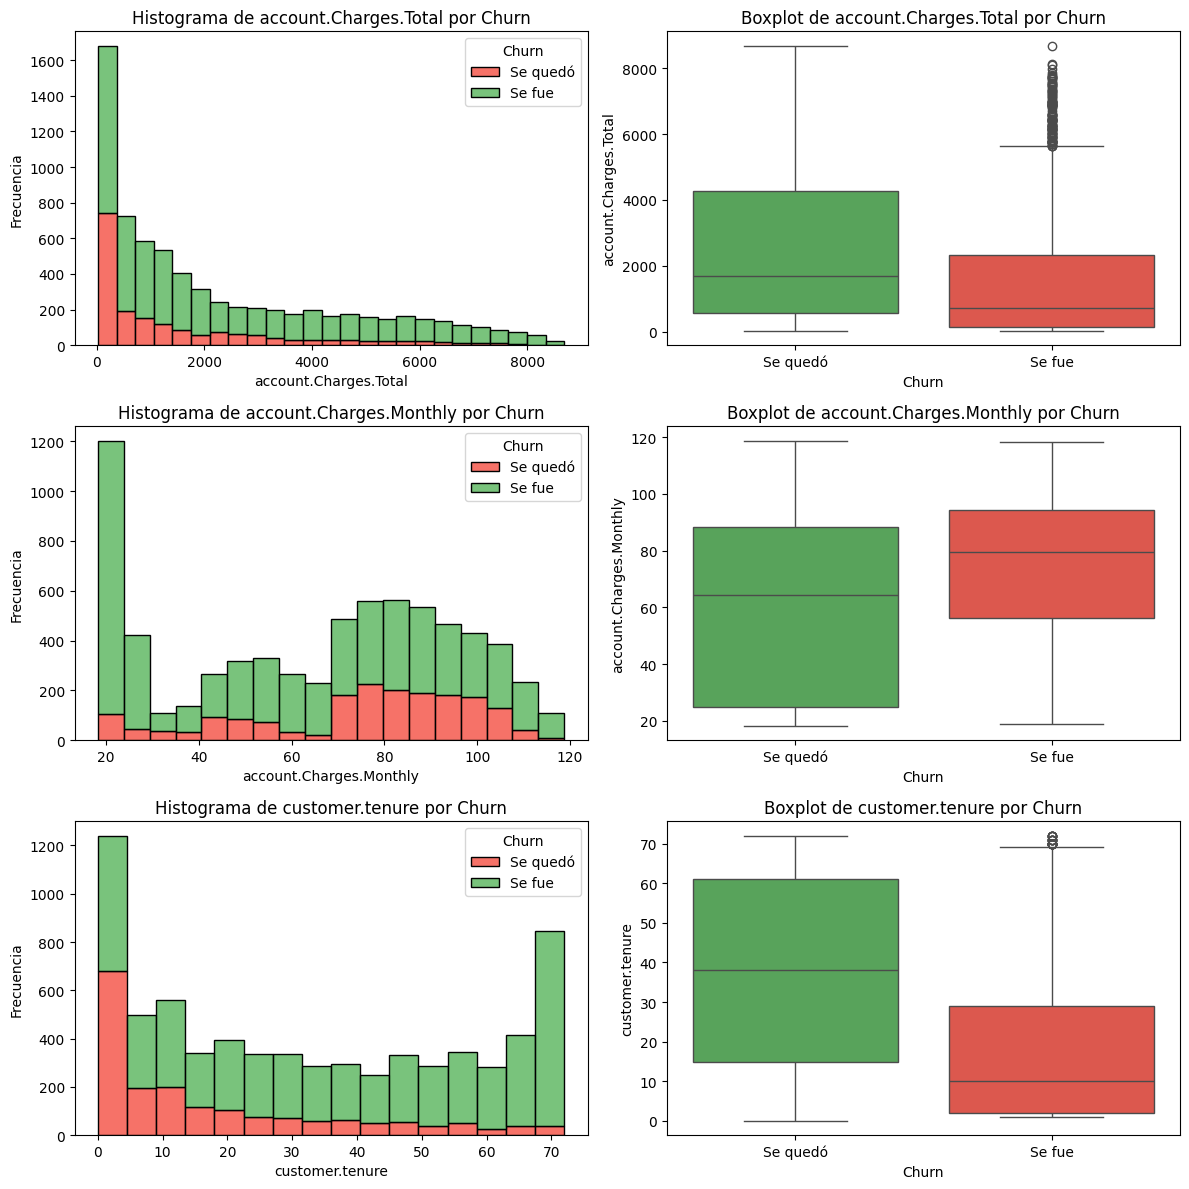

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# ========= 1) Variables numéricas a analizar =========
numericas = [
    'account.Charges.Total',
    'account.Charges.Monthly',
    'customer.tenure'
]
presentes_num = [c for c in numericas if c in df.columns]
if not presentes_num:
    raise ValueError("No encontré las columnas numéricas esperadas. Columnas: " + str(df.columns.tolist()))
print("Voy a analizar estas variables numéricas:", presentes_num)

# ========= 2) Configuración de subplots =========
n = len(presentes_num)
fig, axes = plt.subplots(n, 2, figsize=(12, 4*n))
if n == 1:
    axes = np.array([axes])  # uniformizar formato

# ========= 3) Graficar =========
for i, col in enumerate(presentes_num):
    # Histograma por churn
    sns.histplot(data=df, x=col, hue='churn_bin', multiple='stack', palette=['#4CAF50','#F44336'], ax=axes[i,0])
    axes[i,0].set_title(f'Histograma de {col} por Churn')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Frecuencia')
    axes[i,0].legend(title='Churn', labels=['Se quedó','Se fue'])

    # Boxplot por churn
    sns.boxplot(data=df, x='churn_bin', y=col, palette=['#4CAF50','#F44336'], ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot de {col} por Churn')
    axes[i,1].set_xlabel('Churn')
    axes[i,1].set_ylabel(col)
    axes[i,1].set_xticklabels(['Se quedó','Se fue'])

plt.tight_layout()
plt.show()

#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:
🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).
🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.
🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.
🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.
🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.
Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

**Introducción:** La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

**Limpieza y tratamiento de datos:** Cargar los datos directamente desde la API utilizando Python. Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.


 Verificamos si hay problemas en los datos que puedan afectar el análisis (valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Después de haner identificado las inconsistencias, se aplicaron correcciones necesarias. Se ajustaron los datos para asegurar que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.


**Análisis exploratorio de datos:** Comprender la estructura del dataset y el significado de sus columnas para identificar qué variables son más relevantes para el análisis de evasión de clientes. Consulta del diccionario de datos.

**Conclusiones e insights:** se hicieron graficos de distribución tanto para variables numéricas como categóricas (para ello fue necesario transformarlas a un formato binario).

**Recomendaciones:** Podemos observar que los clientes más susceptibles a irse son los que tienen poco tiempo y/o han pagado poco (gasto acumulado). Aquí valdría la pena considerar campañas agresivas que enganchen al cliente a permanecer por más tiempo con alguna promoción que los incentive a ello.